In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("../data/FuelConsumption.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [4]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


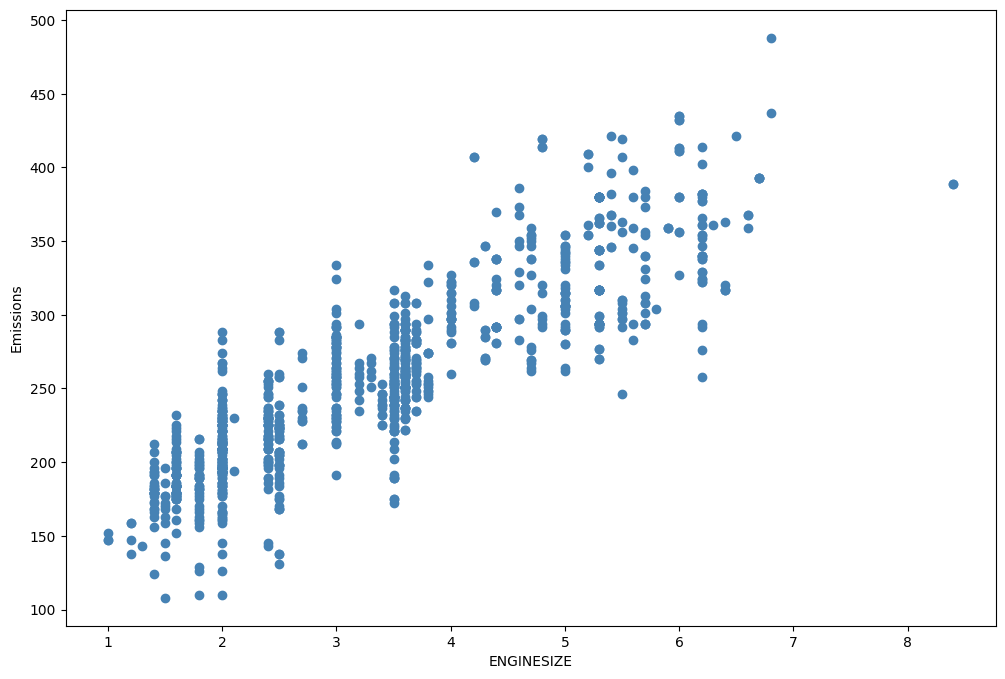

In [5]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

- In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynomial in x.
2nd degree:
y = θ0 + θ1 x + θ2 x^2

For example, the original feature set has only one feature: ENGINESIZE
If we select the degree of the polynomial to be 2:
It generates 3 features: degree=0, degree=1, degree=2

In [7]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)

In [8]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    2.    4.  ]
 [ 1.    3.7  13.69]
 [ 1.    2.5   6.25]
 ...
 [ 1.    3.2  10.24]
 [ 1.    2.5   6.25]
 [ 1.    3.6  12.96]]


- Transformed data looks like feature sets of multiple linear regression analysis.
2nd degree quation would be turn into:
y = θ0 + θ1 x1 + θ2 x2

- Polynomial regression is a special case of linear regression, with selection your features.

In [9]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [10]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         48.72068742 -1.33887321]]
Intercept: [110.58941602]


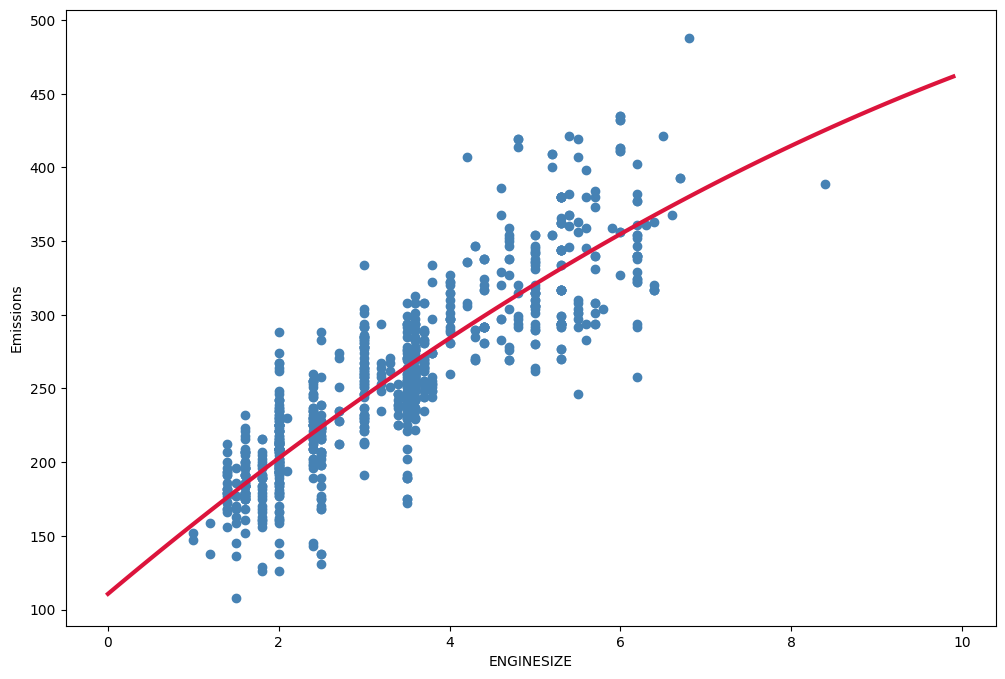

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [12]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[110.58941602 115.44809603 120.27999857 125.08512365 129.86347127
 134.61504143 139.33983412 144.03784934 148.7090871  153.3535474
 157.97123023 162.5621356  167.1262635  171.66361394 176.17418692
 180.65798243 185.11500048 189.54524106 193.94870418 198.32538984
 202.67529803 206.99842875 211.29478202 215.56435781 219.80715615
 224.02317702 228.21242042 232.37488636 236.51057484 240.61948585
 244.7016194  248.75697549 252.78555411 256.78735526 260.76237895
 264.71062518 268.63209395 272.52678525 276.39469908 280.23583545
 284.05019436 287.8377758  291.59857978 295.33260629 299.03985534


# Evaluation
- Mean Absolute Error (MAE)
- Mean Squared Error (SME)
- R2-Score

In [13]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_):.2f}")

Mean Absolute Error (MAE): 23.55
Mean Squared Error (MSE): 960.01
R2-Score: 0.80


# Practice
Try to use a polynomial regression with the dataset but this time with degree three (cubic).
Does it result in better accuracy?

Coefficients:  [[ 0.         27.07802447  4.73661755 -0.51555399]]
Intercept:  [133.29592513]
Mean absolute error: 23.40
Residual sum of squares (MSE): 955.60
R2-score: 0.80


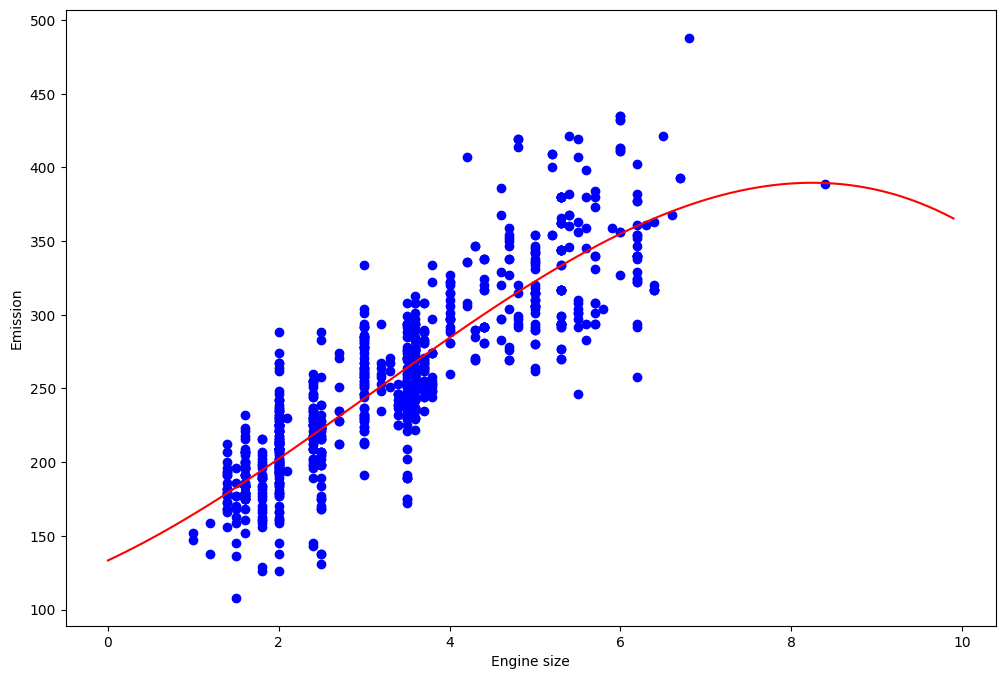

In [17]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

test_x_poly3 = poly3.transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )